# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | flying fish cove
Processing Record 3 of Set 1 | forres
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | we
City not found. Skipping...
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | happy valley-goose bay
Processing Record 9 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | qamdo
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | kingston
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | alotau
City not found. Skipping...
Processing Record 

Processing Record 37 of Set 4 | luderitz
Processing Record 38 of Set 4 | puerto baquerizo moreno
Processing Record 39 of Set 4 | jose mariano jimenez
City not found. Skipping...
Processing Record 40 of Set 4 | muynoq
Processing Record 41 of Set 4 | cadillac
Processing Record 42 of Set 4 | pyhajarvi
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | ouesso
Processing Record 45 of Set 4 | clarinda
Processing Record 46 of Set 4 | manokwari
Processing Record 47 of Set 4 | san sebastian de la gomera
Processing Record 48 of Set 4 | koulamoutou
Processing Record 49 of Set 4 | akure
Processing Record 0 of Set 5 | skovorodino
Processing Record 1 of Set 5 | mindif
Processing Record 2 of Set 5 | galliano
Processing Record 3 of Set 5 | hilo
Processing Record 4 of Set 5 | clitheroe
Processing Record 5 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 5 | abalak
Processing Record 7 of Set 5 | selfoss
Processing Record 8 of Set 5 | rouissat
Processing R

Processing Record 30 of Set 8 | frontera
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | tarko-sale
Processing Record 33 of Set 8 | menongue
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | libenge
Processing Record 36 of Set 8 | zintan
Processing Record 37 of Set 8 | moyobamba
Processing Record 38 of Set 8 | hithadhoo
Processing Record 39 of Set 8 | bandar lampung
Processing Record 40 of Set 8 | kargil
Processing Record 41 of Set 8 | la barceloneta
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | vadso
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set 8 | yoichi
Processing Record 46 of Set 8 | soufriere
Processing Record 47 of Set 8 | benguela
Processing Record 48 of Set 8 | thurso
Processing Record 49 of Set 8 | sao jose da coroa grande
Processing Record 0 of Set 9 | kabare
Processing Record 1 of Set 9 | kawthoung
City not found. Skipping...
Processing Record 2 of Set 9 | belmonte
Proce

Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | mejit
Processing Record 19 of Set 12 | guerrero negro
Processing Record 20 of Set 12 | qashar
Processing Record 21 of Set 12 | nizhnesortymskiy
Processing Record 22 of Set 12 | dazhou
Processing Record 23 of Set 12 | chicxulub puerto
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,299.92,82,75,6.69,US,1690090284
1,flying fish cove,-10.4217,105.6791,298.97,83,100,6.17,CX,1690090284
2,forres,57.6113,-3.6108,286.13,95,75,5.66,GB,1690090284
3,blackmans bay,-43.0167,147.3167,285.22,65,70,1.27,AU,1690090285
4,margate,51.3813,1.3862,290.32,93,100,4.92,GB,1690090285


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,299.92,82,75,6.69,US,1690090284
1,flying fish cove,-10.4217,105.6791,298.97,83,100,6.17,CX,1690090284
2,forres,57.6113,-3.6108,286.13,95,75,5.66,GB,1690090284
3,blackmans bay,-43.0167,147.3167,285.22,65,70,1.27,AU,1690090285
4,margate,51.3813,1.3862,290.32,93,100,4.92,GB,1690090285


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

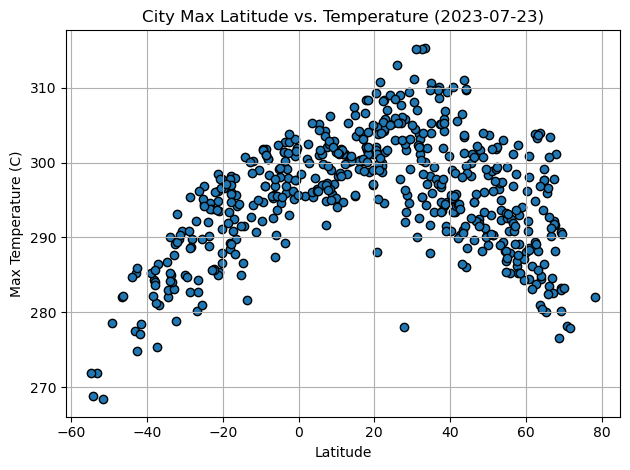

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Get the current date
current_date = time.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({current_date})')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

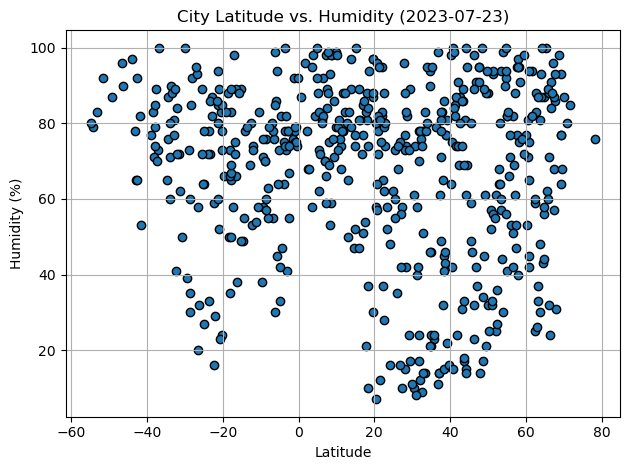

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

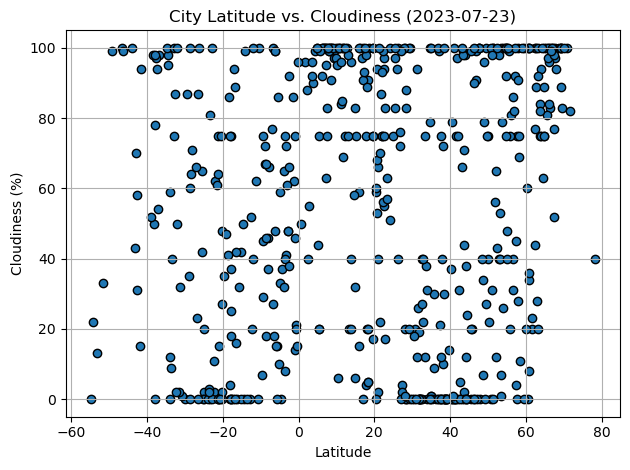

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

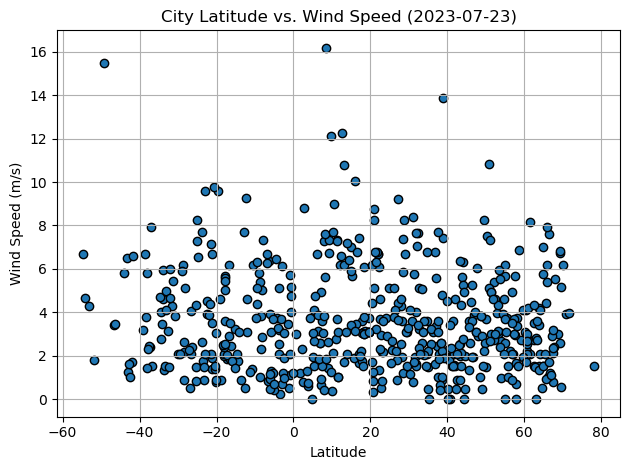

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,299.92,82,75,6.69,US,1690090284
2,forres,57.6113,-3.6108,286.13,95,75,5.66,GB,1690090284
4,margate,51.3813,1.3862,290.32,93,100,4.92,GB,1690090285
6,happy valley-goose bay,53.3168,-60.3315,292.32,94,100,3.09,CA,1690090286
7,albany,42.6001,-73.9662,290.33,87,5,0.89,US,1690090286


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,flying fish cove,-10.4217,105.6791,298.97,83,100,6.17,CX,1690090284
3,blackmans bay,-43.0167,147.3167,285.22,65,70,1.27,AU,1690090285
5,grytviken,-54.2811,-36.5092,268.84,79,22,4.65,GS,1690090285
9,port-aux-francais,-49.3500,70.2167,278.59,87,99,15.47,TF,1690090287
11,west island,-12.1568,96.8225,300.14,74,40,4.63,CC,1690090288


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.2782246492130744


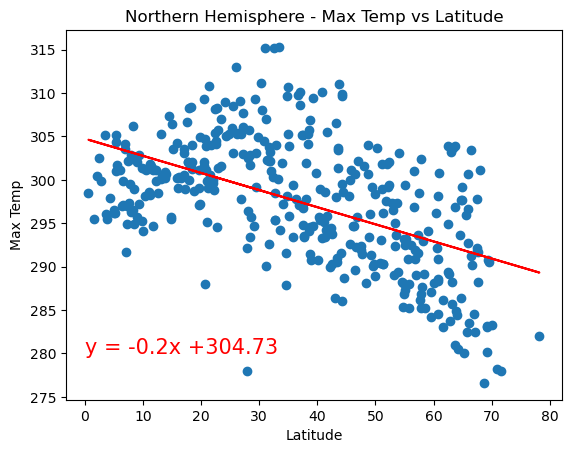

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0, 280),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6659989653981668


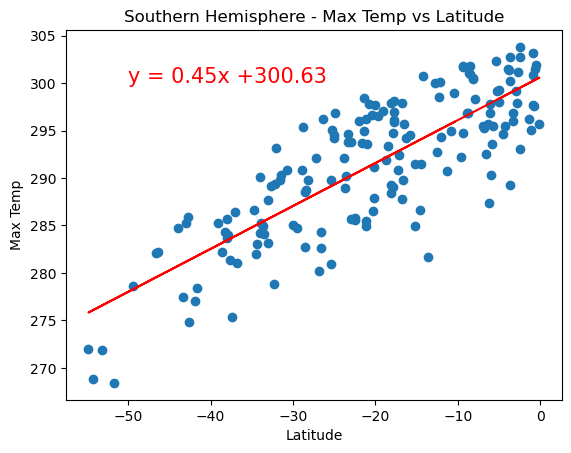

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere shows a negative correlation between Max Temp and Latitude, whilst the Southern Hemisphere shows a positive correlation. Based on the two data sets, it is apparent that the r-value is higher for the Southern Hemisphere, indicating the Southern Hemisphere regression line is a better representation of the relationship between Max Temp and Latitude, than the Northern Hemisphere regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006547321248738881


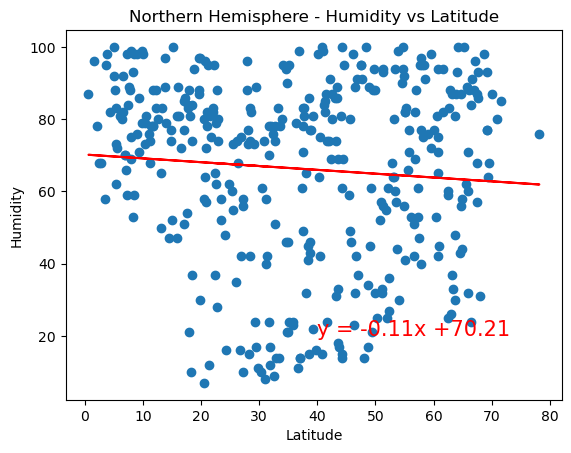

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.018698515872915773


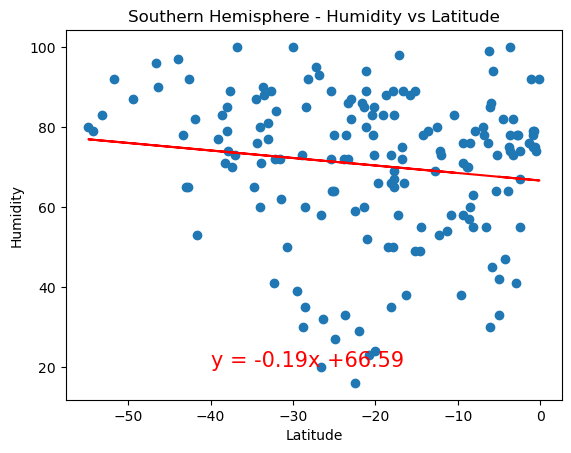

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both the Northern and Souther Hemispheres show a slightly negative correlation between Humidity and Latitude. Both data sets show a very small r-value, indicating that both regression lines poorly represent the relationship between Humidity and Latitude for their respective hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0015243674766191942


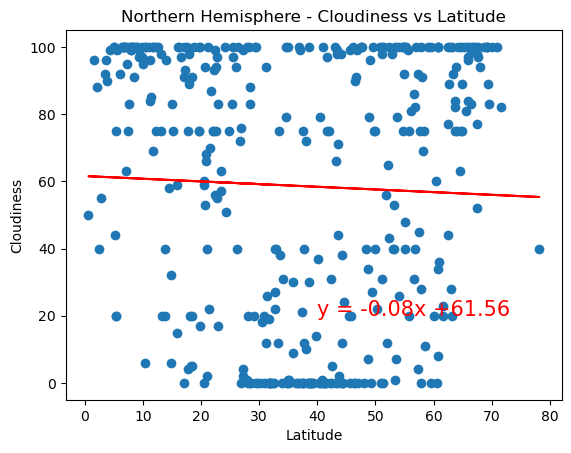

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00729421735370206


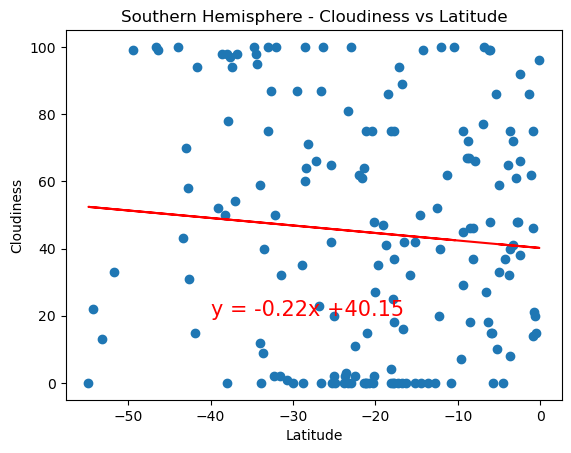

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere show negative correlations between Cloudiness vs Latitude, with the Southern Hemisphere showing a slightly steeper slope. The r-value for both data sets is very low indicating that the regression line poorly represents the relationship between Cloudiness vs Latitude for each respective hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.014798593165257903


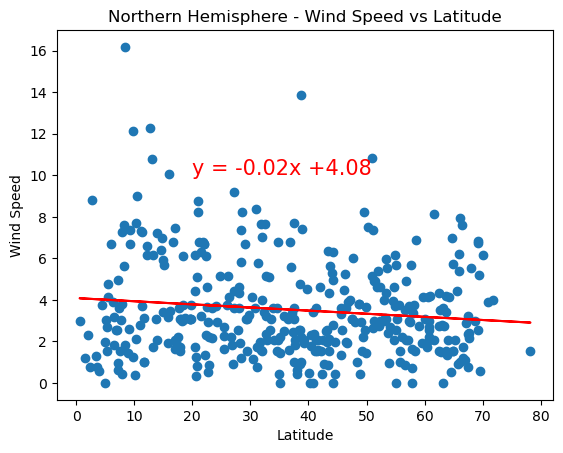

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20, 10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.02714713227941994


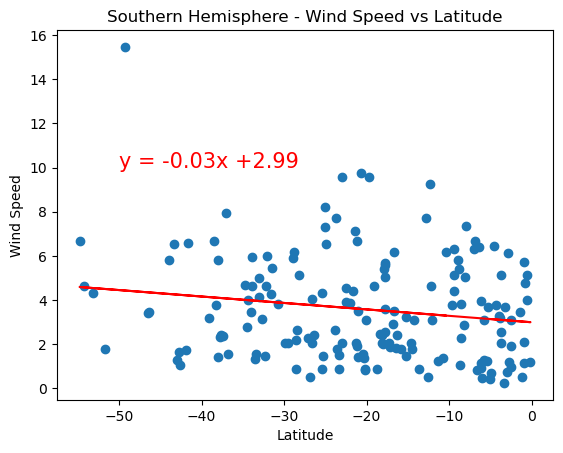

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere show negative correlations between Wind Speed vs Latitude, with the Southern Hemisphere showing a slightly steeper slope. The r-value for both data sets is very low indicating that the regression line poorly represents the relationship between Cloudiness vs Latitude for each respective hemisphere (the Southern Hemisphere r-value is slightly better than that of the Northern Hemisphere).